# Youtube Top 300 Analysis
In this analysis, we are taking a look over the Top 300 Youtube channels. This data set, put together by Vishwanath Seshagiri,
can be accessed [here](https://www.kaggle.com/datasets/iabdulw/top-300-youtube-channels?resource=download). It is a collection of the top 300 Youtube channels, ranked on total views, as well as related data such as start data, genre, number of videos, and subcribers. We will analyze these data points and see if there is any advice for smaller channels that can be determined.

## Goals
> Which genres are leading in views? \
> Which genres are leading in subscribers? \
> Is there a positive or negative correlation between subscribers and total views? \
> Is there a positive or negative correlation between start date and subscribers? \
> Is there a positive or negaive correlation between number of videos and total views?

#### Import Necessary Packages

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Import Dataset and Review Contents

In [29]:
youtube = pd.read_csv("top-300-youtube-channels.csv")
youtube.head()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,0,1,T-Series,237000000,216495600668,18831,Music,2006
1,1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015


#### Check and Clean Data
We will check for any missing values, as well as check for impossible outliers in numeric columns.

First we will check for any missing values within the dataset that may skew our findings.

In [30]:
youtube_na = youtube.isna()
youtube_na.value_counts()

Unnamed: 0  Rank   Channel_Name  Subscriber_Count  Video_Views  Video_Count  Genre  Channel_Started
False       False  False         False             False        False        False  False              296
dtype: int64

Now we will check for impossible outliers.

In [31]:
youtube[["Subscriber_Count", "Video_Views", "Video_Count", "Channel_Started"]].describe()

,Subscriber_Count,Video_Views,Video_Count,Channel_Started
count,2.960000e+02,2.960000e+02,296.000000,296.000000
mean,3.159155e+07,2.199628e+10,19174.331081,2011.368243
std,2.471406e+07,1.942543e+10,46072.700205,3.997822
min,3.720000e+06,1.138766e+10,15.000000,2005.000000
25%,1.737500e+07,1.357843e+10,386.250000,2008.000000
50%,2.570000e+07,1.633676e+10,1984.500000,2011.000000
75%,3.675000e+07,2.284494e+10,8558.000000,2014.000000
max,2.370000e+08,2.164956e+11,345736.000000,2021.000000


After analyzing the min and max for each numeric column, most check out. One sticks out that we should take a closer look at. The maxiumum for Video Count is over 300k, which puts them at an minimum average of 53 videos per day over the past 18 years. 

Also, while looking for missing values, we came across only 296 rows in a supposed 300 dataset. Lets look at that closer as well.

In [32]:
vid_max = youtube["Video_Count"].max()
youtube.loc[youtube["Video_Count"] == vid_max]

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
295,299,300,GMA News,12900000,11387663843,345736,News & Politics,2007


The video being a national news network, and the channel starting in 2007, makes the video count possible. After reviewing their youtube channel, it looks like many highlight videos of their shows are uploaded each day. This explains the high count.

Lets take a look at the row problem now.

In [33]:
youtube.tail()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
291,295,296,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,296,297,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,297,298,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,298,299,Mnet TV,9040000,11442069884,21617,Entertainment,2013
295,299,300,GMA News,12900000,11387663843,345736,News & Politics,2007


In [34]:
youtube.head()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,0,1,T-Series,237000000,216495600668,18831,Music,2006
1,1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015


The ranks are offset from their index value by 1. Somewhere in the data, this stops being true.

In [35]:
offset_errors = youtube[youtube["Rank"] != (youtube.index + 1)]
offset_errors.head()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
36,37,38,PewDiePie,111000000,28920114696,4700,Gaming,2010
37,38,39,Bad Bunny,45300000,28697537555,128,Music,2014
38,39,40,GMANetwork,30100000,28240012927,128766,Entertainment,2006
39,40,41,Infobells - Hindi,49200000,28093078858,526,Education,2014
40,41,42,Taylor Swift,51000000,28081584959,206,Music,2006


In [36]:
youtube.iloc[90:100]

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
90,91,92,etvteluguindia,18700000,21665592262,120122,Entertainment,2010
91,92,93,LUCCAS NETO - LUCCAS TOON,38800000,21619683879,2067,People & Blogs,2014
92,93,94,LeoNata Family,16200000,21562386713,1871,People & Blogs,2021
93,94,95,The Weeknd,31100000,21532436284,131,Music,2011
94,95,96,Rihanna,41200000,21484482902,82,Entertainment,2005
95,97,98,Bollywood Classics,33300000,20890501469,1970,Music,2012
96,98,99,HUM TV,25400000,20838737685,89867,Entertainment,2011
97,99,100,Spinnin' Records,29900000,20780114029,11110,Music,2007
98,100,101,A4,44400000,20710970132,722,Gaming,2014
99,101,102,Inside Edition,11500000,20650907165,29223,News & Politics,2012


In [37]:
youtube.iloc[290:300]

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
290,294,295,eltrece,12100000,11709869278,159305,Entertainment,2014
291,295,296,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,296,297,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,297,298,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,298,299,Mnet TV,9040000,11442069884,21617,Entertainment,2013
295,299,300,GMA News,12900000,11387663843,345736,News & Politics,2007


The data has skips in rank for no apparent reason. Perhaps, when the data was reorganized from the original set collected from the Youtube API, rows with NaNs were completely omitted. With the only 4 rows being omitted, this falls within the acceptable threshold of 5% dropped values. We will continue with the analysis now that the data has been cleaned and checked.

## Which Genres are leading in views?

In [38]:
genre_views = youtube.groupby("Genre")["Video_Views"].sum()
genre_views = genre_views.sort_values(ascending=False)
genre_views

Genre
Music               2424786010175
Entertainment       1413577129943
Film & Animation     730538279845
People & Blogs       638081119552
Education            488360795776
Gaming               308455890573
Comedy               183583656216
News & Politics      166941819185
Sports               114738579212
Howto & Style         25251693106
Pets & Animals        16582763026
Name: Video_Views, dtype: int64

Text(0, 0.5, 'Total views (trillions)')

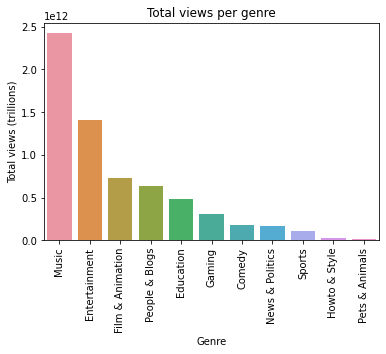

In [39]:
genre_views_bar = sns.barplot(data=youtube, y="Video_Views", x="Genre", estimator=sum, ci=None, order=genre_views.index)
genre_views_bar.tick_params(axis='x', rotation=90)
genre_views_bar.set_title("Total views per genre")
genre_views_bar.set_ylabel("Total views (trillions)")

Here, we clearly see that the Music genre is approaching double the popularity of the next top genre, Entertainment. 

## Which Genre's are leading in Subscribers

In [40]:
genre_subs = youtube.groupby("Genre")["Subscriber_Count"].sum()
genre_subs = genre_subs.sort_values(ascending=False)
genre_subs

Genre
Music               3583570000
Entertainment       1958290000
Film & Animation     995800000
People & Blogs       857250000
Education            629300000
Gaming               580840000
News & Politics      244700000
Comedy               221730000
Sports               181820000
Howto & Style         78900000
Pets & Animals        18900000
Name: Subscriber_Count, dtype: int64

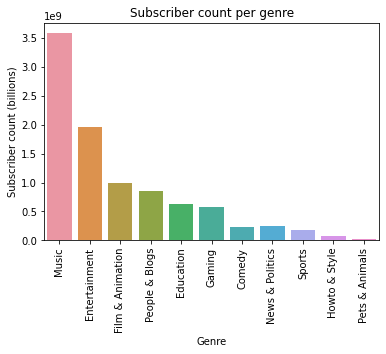

In [41]:
genre_subs_bar = sns.barplot(data=youtube, y="Subscriber_Count", x="Genre", estimator=sum, ci=None, order=genre_views.index,
                            )
genre_subs_bar.set_title("Subscriber count per genre")
genre_subs_bar.set_ylabel("Subscriber count (billions)")
genre_subs_bar.tick_params(axis='x', rotation=90)

Here we see the same trends found in the view count analysis are repeated in subscriber count. This may give us some early insight on our next question to answer.

## Is there a positive or negative correlation between subscribers and total views?

In [42]:
sub_views_corr = youtube["Subscriber_Count"].corr(youtube["Video_Views"])
print(sub_views_corr)

0.8222718333008882


This correlation was calculated using the standar Pearson method. With a value of 0.82, we can deduct there is a strong correlation. Lets visualize this on a channel by channel basis using a scatterplot.

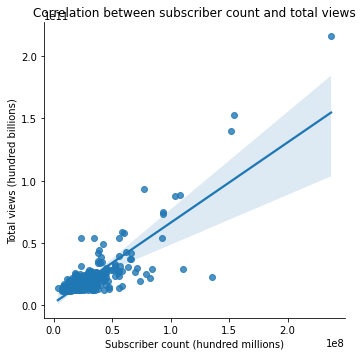

In [43]:
sns.lmplot(data=youtube, x="Subscriber_Count", y="Video_Views")\
          .set(title="Correlation between subscriber count and total views",
               ylabel="Total views (hundred billions)",
               xlabel="Subscriber count (hundred millions)")

## Is there a positive or negative correlation between start date and subscribers?

-0.12412168808320853


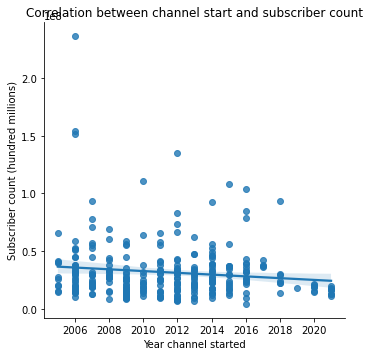

In [44]:
sub_start_corr = youtube["Subscriber_Count"].corr(youtube["Channel_Started"])
print(sub_start_corr)
sns.lmplot(data=youtube, x="Channel_Started", y="Subscriber_Count")\
           .set(title="Correlation between channel start and subscriber count",
                ylabel="Subscriber count (hundred millions)",
                xlabel="Year channel started")

Using the pearson method again, we see a weak correlation of -0.12 between start date and number of subscribers. It trends slightly negative. This would make sense as newer channels have had less time to gather subscribers, but the weak nature of it means this should not be considered when making decisions.

## Is there a positive or negaive correlation between number of videos and total views?

0.05657543648557873


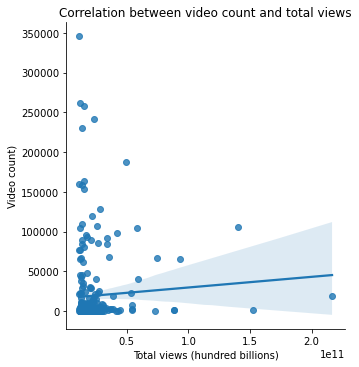

In [45]:
videos_views_corr = youtube["Video_Count"].corr(youtube["Video_Views"])
print(videos_views_corr)
sns.lmplot(data=youtube, x="Video_Views", y="Video_Count")\
            .set(title="Correlation between video count and total views",
                 ylabel="Video count)",
                 xlabel="Total views (hundred billions)")

With a correlation of 0.05, there is little to no connection to video uploads and view counts.

# Conclusions

After the analysis, there is a few things from our data we can offer as advice. These conclusions are limited to the top 300, and may not apply when the data is extended to the top 1,000, or even 10,000, channels. 

- First, the top thing to insure views is to increase your subscriber count. There is a strong correlation, showing that more subscribers do in-fact translate to more views. You should make an attempt within your videos to convert viewers into subscribers when you can.

- Second, there is next to no correlation between start date and video count. New channels should keep this in mind before stretching themselves thin to create more videos. Time should be spent on quality, rather than quantity. It is also never too late to start. At any time, your channel could catch its viral "big break" within the algorithm and propel you past other channels that started years earlier.